# 1. Préliminaires

Importons les bibliothèques :

In [1]:
# Data
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

Chargeons les données :

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
translation = pd.read_csv('product_category_name_translation.csv')

# 2. Présentation des tables

## 2.1. Customers

Forme de la table :

In [3]:
customers.shape

(99441, 5)

Tête de la table (5 premières lignes) :

In [4]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Proportions de valeurs manquantes par variable :

In [5]:
customers.isna().mean().round(2)

customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64

Proportion de doublons :

In [6]:
customers.duplicated().mean().round(2)

0.0

Types des variables :

In [7]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

## 2.2. Geolocation

Forme de la table :

In [8]:
geolocation.shape

(1000163, 5)

Tête de la table (5 premières lignes) :

In [9]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Proportions de valeurs manquantes par variable :

In [10]:
geolocation.isna().mean().round(2)

geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64

Proportion de doublons :

In [11]:
geolocation.duplicated().mean().round(2)

0.26

Types des variables :

In [12]:
geolocation.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

## 2.3. Order items

Forme de la table :

In [13]:
order_items.shape

(112650, 7)

Tête de la table (5 premières lignes) :

In [14]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Proportions de valeurs manquantes par variable :

In [15]:
order_items.isna().mean().round(2)

order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

Proportion de doublons :

In [16]:
order_items.duplicated().mean().round(2)

0.0

Types des variables :

In [17]:
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

Conversion au format date et heure de la variable "shipping_limit_date" :

In [18]:
order_items['shipping_limit_date'] = pd.to_datetime(
    order_items['shipping_limit_date'], format='%Y-%m-%d %H:%M:%S')

## 2.4. Order payments

Forme de la table :

In [19]:
order_payments.shape

(103886, 5)

Tête de la table (5 premières lignes) :

In [20]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Proportions de valeurs manquantes par variable :

In [21]:
order_payments.isna().mean().round(2)

order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64

Proportion de doublons :

In [22]:
order_payments.duplicated().mean().round(2)

0.0

Types des variables :

In [23]:
order_payments.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

## 2.5. Order reviews

Forme de la table :

In [24]:
order_reviews.shape

(99224, 7)

Tête de la table (5 premières lignes) :

In [25]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Proportions de valeurs manquantes par variable :

In [26]:
order_reviews.isna().mean().round(2)

review_id                  0.00
order_id                   0.00
review_score               0.00
review_comment_title       0.88
review_comment_message     0.59
review_creation_date       0.00
review_answer_timestamp    0.00
dtype: float64

Proportion de doublons :

In [27]:
order_reviews.duplicated().mean().round(2)

0.0

Types des variables :

In [28]:
order_reviews.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

Conversion au format date et heure des variables :
- review_creation_date
- review_answer_timestamp

In [29]:
dates = ['review_creation_date', 'review_answer_timestamp']

order_reviews[dates] = order_reviews[dates].apply(
    pd.to_datetime, format='%Y-%m-%d %H:%M:%S')

## 2.6. Orders

Forme de la table :

In [30]:
orders.shape

(99441, 8)

Tête de la table (5 premières lignes) :

In [31]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Proportions de valeurs manquantes par variable :

In [32]:
orders.isna().mean().round(2)

order_id                         0.00
customer_id                      0.00
order_status                     0.00
order_purchase_timestamp         0.00
order_approved_at                0.00
order_delivered_carrier_date     0.02
order_delivered_customer_date    0.03
order_estimated_delivery_date    0.00
dtype: float64

Proportion de doublons :

In [33]:
orders.duplicated().mean().round(2)

0.0

Types des variables :

In [34]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

Conversion au format date et heure des variables :
- order_purchase_timestamp
- order_approved_at
- order_delivered_carrier_date
- order_delivered_customer_date
- order_estimated_delivery_date

In [35]:
dates = ['order_purchase_timestamp',
         'order_approved_at',
         'order_delivered_carrier_date',
         'order_delivered_customer_date',
         'order_estimated_delivery_date']

orders[dates] = orders[dates].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S')

## 2.7. Products

Forme de la table :

In [36]:
products.shape

(32951, 9)

Tête de la table (5 premières lignes) :

In [37]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Proportions de valeurs manquantes par variable :

In [38]:
products.isna().mean().round(2)

product_id                    0.00
product_category_name         0.02
product_name_lenght           0.02
product_description_lenght    0.02
product_photos_qty            0.02
product_weight_g              0.00
product_length_cm             0.00
product_height_cm             0.00
product_width_cm              0.00
dtype: float64

Proportion de doublons :

In [39]:
products.duplicated().mean().round(2)

0.0

Types des variables :

In [40]:
products.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

## 2.8. Sellers

Forme de la table :

In [41]:
sellers.shape

(3095, 4)

Tête de la table (5 premières lignes) :

In [42]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Proportions de valeurs manquantes par variable :

In [43]:
sellers.isna().mean().round(2)

seller_id                 0.0
seller_zip_code_prefix    0.0
seller_city               0.0
seller_state              0.0
dtype: float64

Proportion de doublons :

In [44]:
sellers.duplicated().mean().round(2)

0.0

Types des variables :

In [45]:
sellers.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

## 2.9. Product category name translation

Forme de la table :

In [46]:
translation.shape

(71, 2)

Tête de la table (5 premières lignes) :

In [47]:
translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Proportions de valeurs manquantes par variable :

In [48]:
translation.isna().mean().round(2)

product_category_name            0.0
product_category_name_english    0.0
dtype: float64

Proportion de doublons :

In [49]:
translation.duplicated().mean().round(2)

0.0

Types des variables :

In [50]:
translation.dtypes

product_category_name            object
product_category_name_english    object
dtype: object

# 3. Tableau RFM

On souhaite réaliser une segmentation des clients à partir d'une base de données contenant des informations sur environ 100 000 commandes de 2016 à 2018. Pour cela, on utilisera notamment la méthode RFM, qui permet de segmenter les clients à partir de 3 dimensions :
- **R**écence : _Date de la dernière commande_
- **F**réquence : _Fréquence des commandes_
- **M**ontant : _Somme des commandes cumulées_

Cependant, il va nous falloir créer ces variables à partir de celles que nous avons à disposition. De plus, nos variables se trouvent dans différentes tables. Par ailleurs, nous allons également réaliser une segmentation  prenant en compte la satisfaction des clients. En conséquence, en plus des dimensions RFM, nous sélectionnerons la variable "review_score".

Enfin, les variables que nous utiliserons pour la fusion des données et le feature engineering sont :
- customer_id : _Key to the orders dataset. Each order has a unique customer_id_
- customer_unique_id : _Unique identifier of a customer_
- order_id : _Order unique identifier_
- payment_value : _Transaction value_
- order_purchase_timestamp : _Shows the purchase timestamp_
- review_score : _Note ranging from 1 to 5 given by the customer on a satisfaction survey_

## 3.1. Fusion des données

In [51]:
df = orders.merge(order_payments, how='inner', on='order_id')
df.shape

(103886, 12)

In [52]:
df = df.merge(order_reviews, how='inner', on='order_id')
df.shape

(103677, 18)

In [53]:
df = df.merge(customers, how='inner', on='customer_id')
df.shape

(103677, 22)

In [54]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,...,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3,voucher,...,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,voucher,...,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,...,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,...,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


## 3.2. Filtrage

In [55]:
df['order_status'].value_counts(normalize=True).round(2)

delivered      0.97
shipped        0.01
canceled       0.01
unavailable    0.01
invoiced       0.00
processing     0.00
created        0.00
approved       0.00
Name: order_status, dtype: float64

Nous allons filtrer les lignes de manière à garder uniquement les commandes qui ont été livrées :

In [56]:
df = df[df['order_status'] == 'delivered']
df.shape

(100649, 22)

## 3.3. Feature engineering

Nous avons fusionné les tables nécessaires. Désormais, effectuons notre feature engineering par agrégation :

In [57]:
# Agrégation des données
df = df.groupby('customer_unique_id').agg(
    {'order_purchase_timestamp': 'max',  # Récence
     'order_id': 'count',  # Fréquence
     'payment_value': 'sum',  # Montant
     'review_score': 'mean'  # Satisfaction
     }).reset_index()

# Attribution de noms adéquats à nos variables créées
df = df.rename(columns={'order_purchase_timestamp': 'recency',
                        'order_id': 'frequency',
                        'payment_value': 'monetary'})

# Amputation de la colonne "customer_unique_id" car elle n'a plus d'utilité
df.drop('customer_unique_id', axis=1, inplace=True)

Forme du tableau :

In [58]:
df.shape

(92754, 4)

Tête du tableau (5 premières lignes) :

In [59]:
df.head()

,recency,frequency,monetary,review_score
0,2018-05-10 10:56:27,1,141.90,5.0
1,2018-05-07 11:11:27,1,27.19,4.0
2,2017-03-10 21:05:03,1,86.22,3.0
3,2017-10-12 20:29:41,1,43.62,4.0
4,2017-11-14 19:45:42,1,196.89,5.0


Proportions de valeurs manquantes par variable :

In [60]:
df.isna().mean().round(2)

recency         0.0
frequency       0.0
monetary        0.0
review_score    0.0
dtype: float64

Proportion de doublons :

In [61]:
df.duplicated().mean().round(2)

0.0

Types des variables :

In [62]:
df.dtypes

recency         datetime64[ns]
frequency                int64
monetary               float64
review_score           float64
dtype: object

Pour segmenter les clients, nous utiliserons des algorithmes d'apprentissage non supervisé. Or ces algorithmes ne peuvent pas utiliser le type "datetime64\[ns\]". Par conséquent, il est nécessaire de préalablement convertir la variable "recency" en un format numérique. Nous pouvons notamment pour chaque individu calculer la différence en nombre de jours entre sa date de dernière commande et une date de référence. Cette date de référence sera la date la plus récente de la variable "recency", c'est-à-dire la valeur maximale de la variable.

In [63]:
# Date de référence
ref_date = df['recency'].max()
ref_date

Timestamp('2018-08-29 15:00:37')

La date la plus récente est le 29 août 2018. Pour chaque client, calculons le nombre de jours entre la date de dernière commande et la date de référence :

In [64]:
# Différence en nombre de jours entre la date de référence et la date de dernière commande
df['recency'] = df['recency'].apply(lambda x: (ref_date - x).days)

# Affichage du type de la variable
df['recency'].dtypes

dtype('int64')

# 4. Traitement des outliers

In [65]:
df.describe().round(2)

,recency,frequency,monetary,review_score
count,92754.00,92754.00,92754.00,92754.00
mean,236.79,1.09,165.64,4.15
std,152.59,0.48,226.50,1.28
min,0.00,1.00,9.59,1.00
25%,113.00,1.00,63.09,4.00
50%,218.00,1.00,107.82,5.00
75%,345.00,1.00,182.91,5.00
max,694.00,33.00,13664.08,5.00


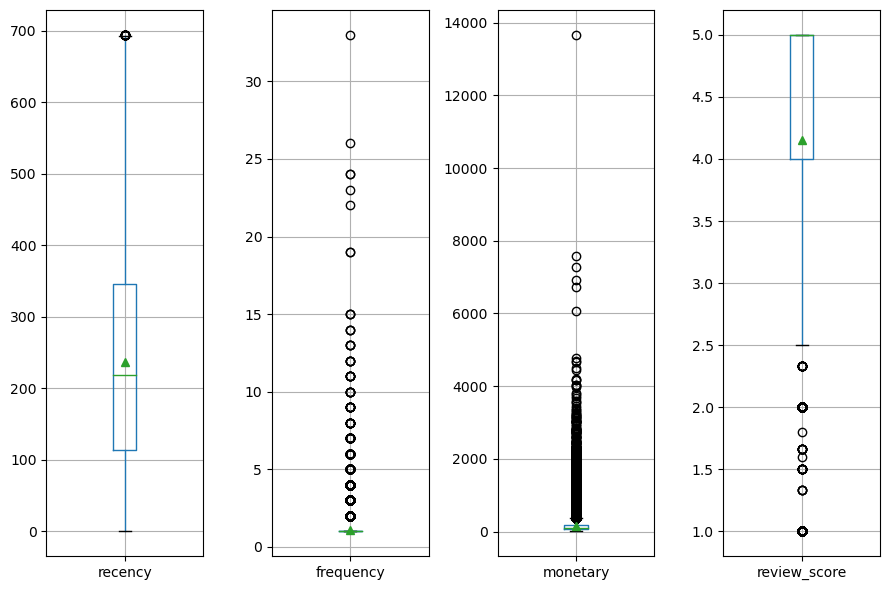

In [66]:
# Taille de la figure
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(9, 6))

# Box plots
df.boxplot(column='recency', ax=axes[0], showmeans=True)
df.boxplot(column='frequency', ax=axes[1], showmeans=True)
df.boxplot(column='monetary', ax=axes[2], showmeans=True)
df.boxplot(column='review_score', ax=axes[3], showmeans=True)

# Ajustement de l'espacement entre les plots
fig.tight_layout()

# Affichage
plt.show()

La variable la plus asymétrique est "frequency".

In [67]:
df['frequency'].astype('object').describe()

count     92754
unique       21
top           1
freq      87264
Name: frequency, dtype: int64

La majorité des clients n'ont effectué qu'une seule commande. Ceux qui ont réalisé plus d'une commande correspondent aux outliers.

In [68]:
# Nombre total de clients
nb_total = df['frequency'].count()

# Nombre de clients ayant effectué plus d'une commande
nb_multiple_orders = df.loc[df['frequency'] > 1, 'frequency'].count()

# Pourcentage de clients ayant effectué plus d'une commande
perc_multiple_orders = nb_multiple_orders * 100 / nb_total

print(round(perc_multiple_orders, 2))

5.92


Il n'y a que 5.92 % des clients qui ont réalisé plusieurs commandes. En conséquence, l'amputation d'outliers pour la variable "frequency" aura un impact négligeable sur les distances entre les individus par rapport à l'étendue de la variable.

Cependant, il semble que les distances entre les individus pour la variable "monetary" (qui aussi très asymétrique) puissent être plus importantes en amputant les outliers qui ont une valeur supérieure à 1000. 

In [69]:
df = df[df['monetary'] <= 1000]
df.shape

(91592, 4)

# 4. Analyses univariées

## 4.1. Récence

In [70]:
df['recency'].describe().round(2)

count    91592.00
mean       236.76
std        152.58
min          0.00
25%        113.00
50%        218.00
75%        345.00
max        694.00
Name: recency, dtype: float64

In [71]:
def plot_hist_box(df, column, bins, density):
    """
    Affiche l'histogramme et le box plot d'une variable.

    Positional arguments :
    -------------------------------------
    df : DataFrame : Le jeu de données.
    column : str : Nom de la variable (colonne) à représenter.
    bins : int : Nombre de classes à utiliser par l'histogramme.
    density : bool : Si True, renvoie une densité de probabilité par classe. Sinon, renvoie l'effectif par classe.
    """
    # Taille de la figure
    fig, axes = plt.subplots(nrows=2, ncols=1,
                             gridspec_kw={'height_ratios': [4, 1]}, figsize=(10, 8))

    # Histogramme
    axes[0].hist(x=df[column], bins=bins, density=density)
    if density == True:
        axes[0].set_ylabel('Densité', fontsize=12)
    else:
        axes[0].set_ylabel('Effectif', fontsize=12)
    axes[0].grid()

    # Box plot
    axes[1].boxplot(x=df[column], showmeans=True,
                    widths=0.5, vert=False)
    axes[1].set_yticks([])
    axes[1].grid(axis='x')

    # Affichage
    plt.show()

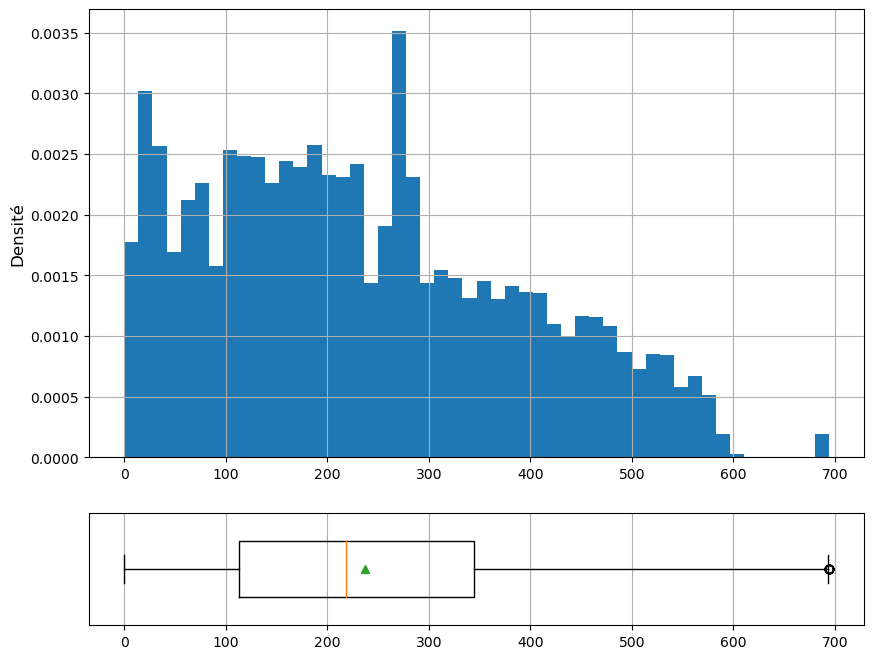

In [72]:
plot_hist_box(df=df, column='recency', bins=50, density=True)

In [73]:
# Skewness empirique
df['recency'].skew().round(2)

0.45

La distribution est légèrement asymétrique. Elle est oblique à gauche. Elle présente peu d'outliers. Plus la valeur de "recency" (en nombre de jours) est proche de 0, plus la dernière commande du client est récente. On peut voir qu'au moins 75% des dernières commandes de clients se concentrent sur la moitié la plus récente de l'amplitude totale (694 jours) de la variable "recency".

## 4.2. Fréquence

In [74]:
df['frequency'].describe().round(2)

count    91592.00
mean         1.08
std          0.48
min          1.00
25%          1.00
50%          1.00
75%          1.00
max         33.00
Name: frequency, dtype: float64

In [75]:
# Nombre total de clients
nb_total = df['frequency'].count()

# Nombre de clients ayant effectué plus d'une commande
nb_multiple_orders = df.loc[df['frequency'] > 1, 'frequency'].count()

# Pourcentage de clients ayant effectué plus d'une commande
perc_multiple_orders = nb_multiple_orders * 100 / nb_total

print(round(perc_multiple_orders, 2))

5.83


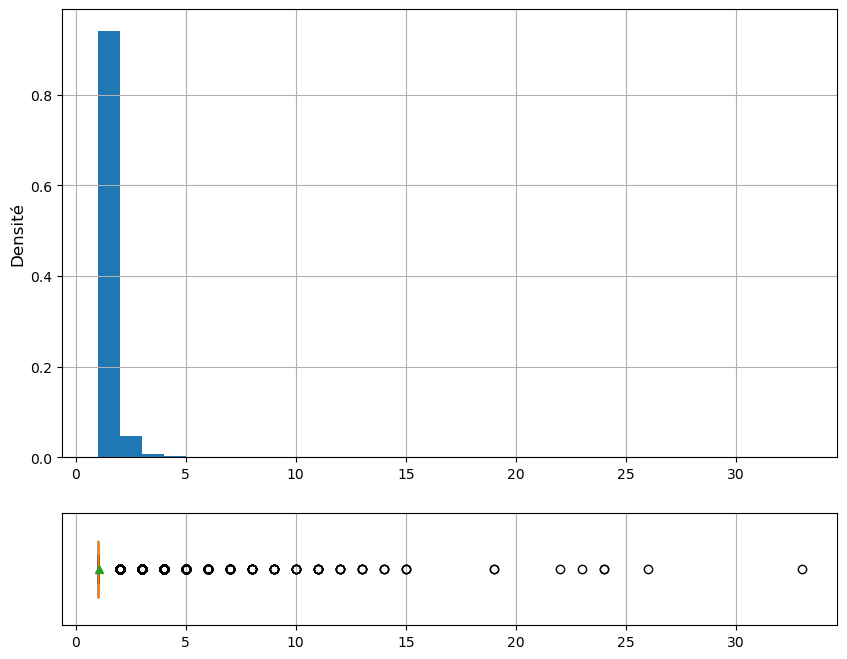

In [76]:
# Nombre de classes à représenter
bins = df['frequency'].max() - df['frequency'].min()

# Figure
plot_hist_box(df=df, column='frequency', bins=bins, density=True)

In [77]:
# Skewness empirique
df['frequency'].skew().round(2)

18.31

La distribution est très asymétrique. Elle est oblique à gauche. Les valeurs atypiques élevées correspondent aux clients ayant effectué plus d'une commande. Ces clients représentent 5.83 %.

## 4.3. Montant

In [78]:
df['monetary'].describe().round(2)

count    91592.00
mean       147.73
std        137.21
min          9.59
25%         62.65
50%        106.76
75%        178.03
max        999.68
Name: monetary, dtype: float64

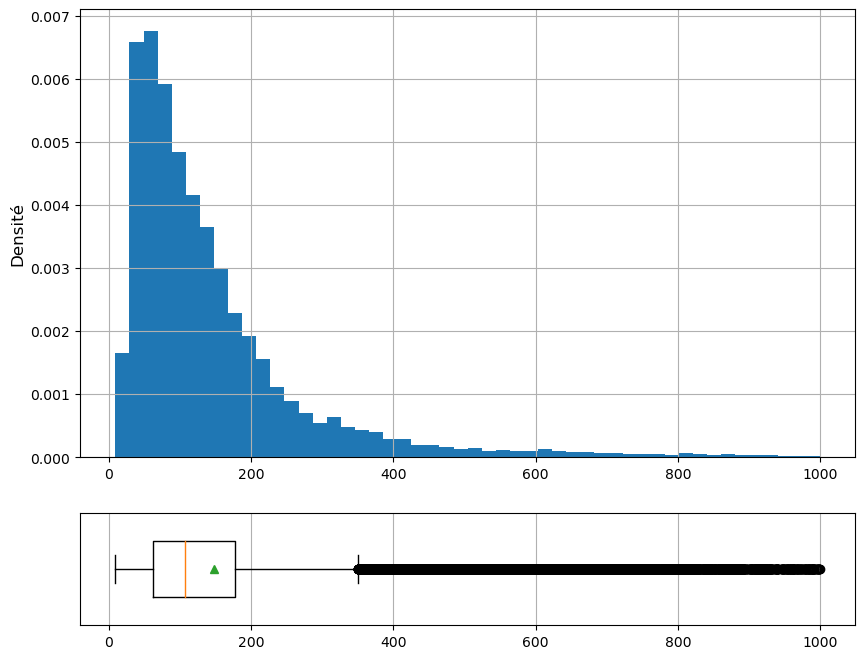

In [79]:
plot_hist_box(df=df, column='monetary', bins=50, density=True)

In [80]:
# Skewness empirique
df['monetary'].skew().round(2)

2.61

La distribution est asymétrique. Elle est étalée à droite. Il y a plusieurs valeurs atypiques élevées. On peut constater que 75% des clients n'ont pas dépensé plus 178.03 réals brésiliens.

## 4.4. Satisfaction

In [81]:
df['review_score'].describe().round(2)

count    91592.00
mean         4.16
std          1.28
min          1.00
25%          4.00
50%          5.00
75%          5.00
max          5.00
Name: review_score, dtype: float64

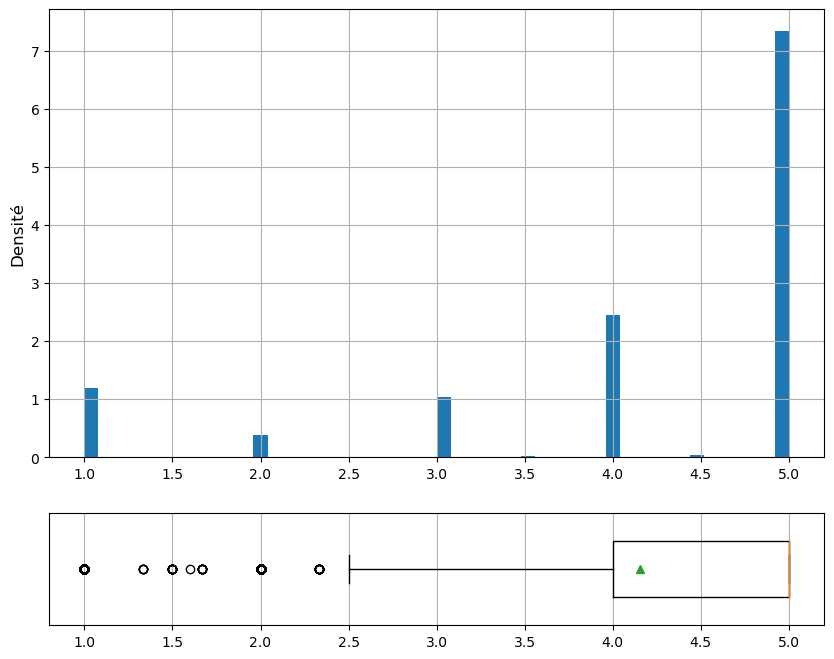

In [82]:
plot_hist_box(df=df, column='review_score', bins=50, density=True)

La distribution est asymétrique. Elle est étalée à gauche. Il y a plusieurs valeurs atypiques inférieures. La plupart des individus se concentrent autour des valeurs 1, 2, 3, 4 et 5. On constate qu'au moins la moitié des clients ont attribué une note de satisfaction de 5, qui est la note maximale.

# 5. Analyse bivariée

Matrice des coefficients de corrélation de Pearson entre les variables :

In [83]:
df.corr().round(2)

,recency,frequency,monetary,review_score
recency,1.00,0.02,-0.01,-0.01
frequency,0.02,1.00,0.09,0.00
monetary,-0.01,0.09,1.00,-0.04
review_score,-0.01,0.00,-0.04,1.00


Carte de chaleur des coefficients de corrélation entre les variables :

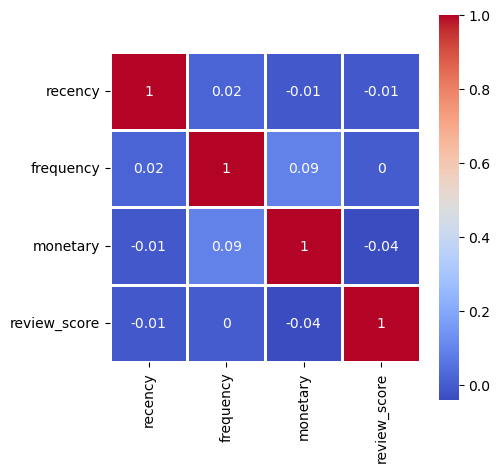

In [84]:
# Taille de la figure
plt.figure(figsize=(5, 5))

# Carte de chaleur
sns.heatmap(df.corr().round(2),
            annot=True,
            cmap="coolwarm",
            linewidths=1,
            linecolor='white',
            square=True)

# Affichage de la figure
plt.show()

Les coefficients de corrélation entre les variables sont proches de 0. Les variables sont donc indépendantes l'une de l'autre.

# 6. Exportation

Pour finir, exportons notre tableau au format CSV :

In [85]:
df.to_csv('RFM_data.csv', index=False)